In [6]:
!pip install scikit-learn
!pip install datasets

#### Create datasets to evaluate

In [7]:
from datasets import load_dataset

dataset = load_dataset("mclemcrew/mix-evaluation-dataset")

/Users/mclem/Development/MixologyDB/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
import json

ground_truth = []

for row in dataset['test']:
    parameter_json = json.loads(row['parameters'])
    ground_truth.append(list(parameter_json.keys()))
    
ground_truth

[['gain', 'pan', 'eq', 'compression', 'reverb'],
 ['gain', 'pan', 'eq', 'reverb', 'delay'],
 ['gain', 'pan', 'eq'],
 ['gain', 'pan', 'compression'],
 ['gain', 'pan', 'compression', 'reverb'],
 ['gain', 'pan', 'reverb'],
 ['gain', 'pan', 'eq', 'reverb'],
 ['gain', 'pan', 'eq', 'compression'],
 ['gain', 'pan', 'reverb'],
 ['gain', 'pan', 'eq', 'compression', 'reverb'],
 ['gain', 'pan'],
 ['gain', 'pan', 'eq', 'compression', 'reverb'],
 ['gain', 'pan', 'eq', 'reverb'],
 ['gain', 'pan', 'eq', 'reverb', 'delay'],
 ['gain', 'pan', 'reverb', 'compression'],
 ['gain', 'pan'],
 ['gain', 'pan', 'reverb'],
 ['gain', 'pan', 'compression'],
 ['gain', 'pan', 'eq', 'compression', 'reverb'],
 ['gain', 'pan'],
 ['gain', 'pan', 'eq', 'reverb'],
 ['gain', 'pan', 'eq', 'reverb'],
 ['gain', 'pan', 'eq', 'compression', 'reverb', 'delay'],
 ['gain', 'pan', 'eq', 'compression', 'reverb'],
 ['gain', 'pan', 'eq', 'gate'],
 ['gain', 'pan', 'eq', 'compression', 'gate'],
 ['gain', 'pan'],
 ['gain', 'pan', 'eq', 'c

In [29]:
import json

def transform_data(txt_file_path):
    """
    Transforms data from a structured text file into the desired array format.

    Args:
        txt_file_path (str): The path to the input text file.

    Returns:
        list: A list of lists containing the extracted effect data.
    """
    result = []

    with open(txt_file_path, 'r') as file:
        data = json.loads(file.read())  

    for track in data:
        effects_data = track[2] 

        # Extract only the effect names (keys)
        effects = list(effects_data.keys()) 
        
        result.append(effects)

    return result

file_path_turbo = "../ml-tasks/gpt-4-turbo-output-cleaned.txt"
transformed_data_turbo = transform_data(file_path_turbo)

file_path_4o = "../ml-tasks/gpt-4o-output-cleaned.txt"
transformed_data_4o = transform_data(file_path_4o)

In [37]:
effect_baseline = []

for i in range(500):
    effect_baseline.append(['eq', 'compression', 'reverb', 'gain', 'pan'])
    
effect_baseline

[['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression', 'reverb', 'gain', 'pan'],
 ['eq', 'compression

### Effect Evaluation

GPT 4 Turbo Model - Accuracy: 0.006, Precision: 0.5069222577209798, Recall: 0.9704383282364933, F1 Score: 0.6659671213711088, ROC AUC: 0.6659671213711088
GPT 4o Model - Accuracy: 0.012, Precision: 0.5831540116815247, Recall: 0.9668705402650357, F1 Score: 0.72751677852349, ROC AUC: 0.7918015787814721
Effect Baseline Model - Accuracy: 0.204, Precision: 0.7504, Recall: 0.9561671763506626, F1 Score: 0.8408785298072613, ROC AUC: 0.8898981726863545


/Users/mclem/Development/MixologyDB/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['compressor', 'delimiter', 'reveraction', 'reverg'] will be ignored
  warnings.warn(
/Users/mclem/Development/MixologyDB/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['choirus'] will be ignored
  warnings.warn(


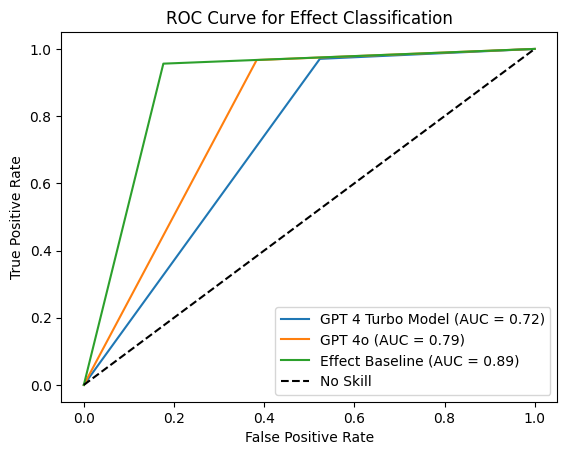

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve
from sklearn.preprocessing import MultiLabelBinarizer

# Example ground truth and model predictions
# ground_truth = [['reverb', 'compression'], ['eq'], ['reverb', 'eq'], ['compression']]
# gpt_predictions = [['reverb', 'compression'], ['eq', 'reverb'], ['reverb'], ['compression', 'eq']]
# own_model_predictions = [['reverb'], ['eq'], ['reverb', 'eq'], ['compression']]

# Binarize the labels for multi-label classification
mlb = MultiLabelBinarizer()
y_true = mlb.fit_transform(ground_truth)
y_gpt_turbo = mlb.transform(transformed_data_turbo)
y_gpt_4o = mlb.transform(transformed_data_4o)
y_effect_baseline = mlb.transform(effect_baseline)
# y_own = mlb.transform(own_model_predictions)

# Calculate accuracy
accuracy_gpt_turbo = accuracy_score(y_true, y_gpt_turbo)
accuracy_gpt_4o = accuracy_score(y_true, y_gpt_4o)
accuracy_effect_baseline = accuracy_score(y_true, y_effect_baseline)
# accuracy_own = accuracy_score(y_true, y_own)

# Calculate precision, recall, and F1 score
precision_gpt_turbo, recall_gpt_turbo, f1_gpt_turbo, _ = precision_recall_fscore_support(y_true, y_gpt_turbo, average='micro')
precision_gpt_4o, recall_gpt_4o, f1_gpt_4o, _ = precision_recall_fscore_support(y_true, y_gpt_4o, average='micro')
precision_effect_baseline, recall_effect_baseline, f1_effect_baseline, _ = precision_recall_fscore_support(y_true, y_effect_baseline, average='micro')

# Calculate ROC AUC
roc_auc_gpt_turbo = roc_auc_score(y_true, y_gpt_turbo, average='micro')
roc_auc_gpt_4o = roc_auc_score(y_true, y_gpt_4o, average='micro')
roc_auc_effect_baseline = roc_auc_score(y_true, y_effect_baseline, average='micro')

# Print the results
print(f"GPT 4 Turbo Model - Accuracy: {accuracy_gpt_turbo}, Precision: {precision_gpt_turbo}, Recall: {recall_gpt_turbo}, F1 Score: {f1_gpt_turbo}, ROC AUC: {f1_gpt_turbo}")
print(f"GPT 4o Model - Accuracy: {accuracy_gpt_4o}, Precision: {precision_gpt_4o}, Recall: {recall_gpt_4o}, F1 Score: {f1_gpt_4o}, ROC AUC: {roc_auc_gpt_4o}")
print(f"Effect Baseline Model - Accuracy: {accuracy_effect_baseline}, Precision: {precision_effect_baseline}, Recall: {recall_effect_baseline}, F1 Score: {f1_effect_baseline}, ROC AUC: {roc_auc_effect_baseline}")

# Plot ROC curves
fpr_gpt_turbo, tpr_gpt_turbo, _ = roc_curve(y_true.ravel(), y_gpt_turbo.ravel())
fpr_gpt_4o, tpr_gpt_4o, _ = roc_curve(y_true.ravel(), y_gpt_4o.ravel())
fpr_effect_baseline, tpr_effect_baseline, _ = roc_curve(y_true.ravel(), y_effect_baseline.ravel())

plt.figure()
plt.plot(fpr_gpt_turbo, tpr_gpt_turbo, label=f'GPT 4 Turbo Model (AUC = {roc_auc_gpt_turbo:.2f})')
plt.plot(fpr_gpt_4o, tpr_gpt_4o, label=f'GPT 4o (AUC = {roc_auc_gpt_4o:.2f})')
plt.plot(fpr_effect_baseline, tpr_effect_baseline, label=f'Effect Baseline (AUC = {roc_auc_effect_baseline:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Effect Classification')
plt.legend(loc='best')
plt.show()

### Parameter Evaluation

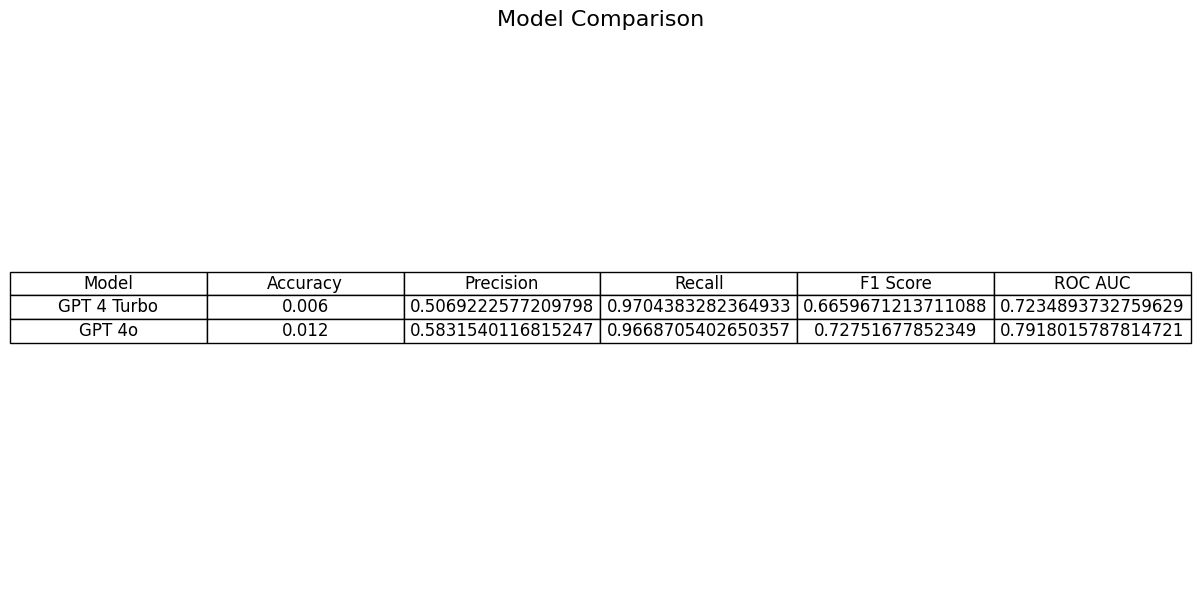

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve
from sklearn.preprocessing import MultiLabelBinarizer

# ... (previous code remains the same) ...

# Create a table to compare the models
models = ['GPT 4 Turbo', 'GPT 4o']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Effect classification results
effect_results = [
    [accuracy_gpt_turbo, precision_gpt_turbo, recall_gpt_turbo, f1_gpt_turbo, roc_auc_gpt_turbo],
    [accuracy_gpt_4o, precision_gpt_4o, recall_gpt_4o, f1_gpt_4o, roc_auc_gpt_4o]
]

# Parameter classification results (placeholder values)
# parameter_results = [
#     [0.85, 0.82, 0.88, 0.85, 0.92],
#     [0.90, 0.87, 0.93, 0.90, 0.95]
# ]

# Value estimation results (placeholder values)
# value_results = [
#     [0.78, 0.75, 0.80, 0.77, 0.85],
#     [0.82, 0.79, 0.84, 0.81, 0.88]
# ]

# Create a figure and axes for the table
fig, ax = plt.subplots(figsize=(12, 6))

# Hide axes
ax.axis('off')
ax.axis('tight')

# Create the table
table_data = [['Model'] + metrics]
for i in range(len(models)):
    table_data.append([models[i]] + effect_results[i])
    # table_data.append([''] + parameter_results[i])
    # table_data.append([''] + value_results[i])

# Add the table to the plot
table = ax.table(cellText=table_data, loc='center', cellLoc='center')

# Set table properties
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Add a title to the table
ax.set_title('Model Comparison', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()